# IvisPro StellarMap Data Wrangling

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read csv

In [2]:
hyg_df = pd.read_csv("../data/hygdata_v3.csv")

### Reduce and translate columns

In [3]:
hyg_df.drop(hyg_df.columns.difference(
    ['id', 'hr', 'gl', 'bf', 'proper', 'dist', 'mag', 'absmag', 'spect', 'ci', 'x', 'y', 'z', 'con', 'lum']), 1, inplace = True)

In [4]:
dict = {
    'id':   'index',
    'hr':   'idHarvard',
    'gl':     'idGliese',
    'bf':       'idYaleBright',
    'proper': 'name',
    'dist': 'distance',
    'mag': 'magnitude',
    'absmag':  'absoluteMagnitude',
    'spect': 'spectralType',
    'ci': 'colorIndex',
    'x':   'xCoord',
    'y':   'yCoord',
    'z':   'zCoord',
    'con': 'constellation',
    'lum': 'luminosity'
}

hyg_df.columns = hyg_df.columns.to_series().map(dict)

### Drop rows with NaN/Null on specific columns

In [5]:
hyg_df = hyg_df.dropna(subset=['spectralType'])
hyg_df = hyg_df.dropna(subset=['idHarvard', 'idGliese', 'idYaleBright', 'name'], how='all')

In [6]:
print(len(hyg_df.index))

11980


### Merge different naming columns to one designation

In [7]:
designation = []
for index, row in hyg_df.iterrows():
    if(pd.notnull(row['name'])):
        designation.append(row['name'])
    elif(pd.notnull(row['idYaleBright'])):
        designation.append(row['idYaleBright'])
    elif(pd.notnull(row['idGliese'])):
        designation.append(row['idGliese'])
    elif(pd.notnull(row['idHarvard'])):
        designation.append(row['idHarvard'])

In [8]:
del hyg_df['name']
del hyg_df['idGliese']
del hyg_df['idYaleBright']
del hyg_df['idHarvard']
hyg_df.insert (1, "designation", designation)

### Save dataframe

In [9]:
hyg_df.to_csv("../data/hygdata_prepared.csv")
hyg_df.to_json("../data/hygdata_prepared.json")

In [12]:
def drawHist(data, bins, title, xlabel, unit):
    plt.hist(data, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel + " " + unit)
    plt.ylabel('count')
    plt.show()

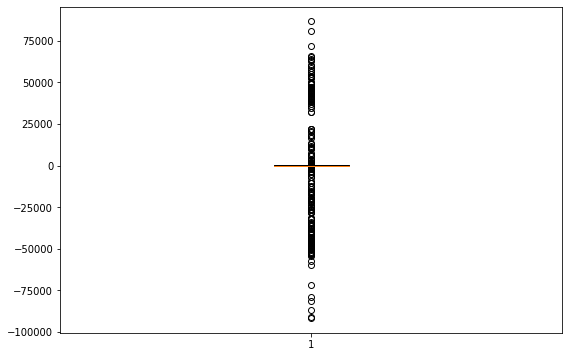

In [11]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(hyg_df['xCoord'])

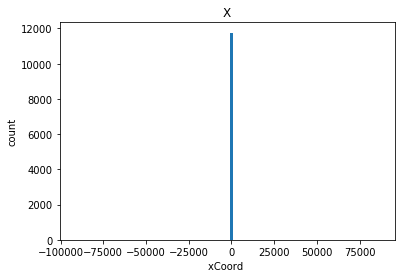

In [13]:
drawHist(hyg_df['xCoord'], 100, 'X', 'xCoord' , '')